# Pivot Points Recreation Analysis
## Comprehensive Pivot Detection Using Modular Scripts

This notebook demonstrates comprehensive pivot point detection using the modular scripts from the trendline analysis framework.

**Key Features:**
- **6 Pivot Detection Methods**: scipy, rolling, zigzag, fractal, slope, derivative
- **Modular Design**: Uses extracted scripts for reusable pivot detection
- **LOG SCALE Analysis**: Percentage-based analysis for exponential patterns
- **Comprehensive Visualization**: All pivot points with method identification
- **Statistical Analysis**: Pivot density, method effectiveness, and distribution

**Scripts Used:**
- `scripts/stock_data_loader.py` - Data loading and preprocessing
- `scripts/pivot_detector.py` - Multi-method pivot detection
- `scripts/trendline_extractor.py` - Main orchestrator class

In [100]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting with WHITE background
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
sns.set_palette("husl")

# Import our modular scripts
from scripts.trendline_extractor import TrendlineExtractor
from scripts.stock_data_loader import check_database_contents

print("📦 Libraries and scripts imported successfully!")
print("🔍 Ready for comprehensive pivot point analysis")

📦 Libraries and scripts imported successfully!
🔍 Ready for comprehensive pivot point analysis


In [101]:
# Configuration
SYMBOL = 'QQQ'  # Change this to test different stocks: QQQ, AAPL, MSFT, GOOGL, TSLA
LOOKBACK_DAYS = 365  # 1 year of data

print(f"🎯 Configuration:")
print(f"   Symbol: {SYMBOL}")
print(f"   Lookback: {LOOKBACK_DAYS} days")

print(f"\n🔍 Pivot Detection Methods:")
print(f"   • scipy: Local extrema using scipy.signal.argrelextrema")
print(f"   • rolling: Rolling window extremes detection")
print(f"   • zigzag: Percentage-based ZigZag pattern detection")
print(f"   • fractal: Williams Fractal pattern detection")
print(f"   • slope: Slope change detection at turning points")
print(f"   • derivative: Derivative-based inflection point detection")

🎯 Configuration:
   Symbol: QQQ
   Lookback: 365 days

🔍 Pivot Detection Methods:
   • scipy: Local extrema using scipy.signal.argrelextrema
   • rolling: Rolling window extremes detection
   • zigzag: Percentage-based ZigZag pattern detection
   • fractal: Williams Fractal pattern detection
   • slope: Slope change detection at turning points
   • derivative: Derivative-based inflection point detection


In [102]:
# Check database contents and create TrendlineExtractor instance
print("🔍 Checking database contents...")
database_info = check_database_contents()

# Create TrendlineExtractor instance (we'll use it just for pivot detection)
extractor = TrendlineExtractor(
    symbol=SYMBOL,
    lookback_days=LOOKBACK_DAYS,
    projection_days=5,  # Not used for pivot analysis
    max_trendlines=10,  # Not used for pivot analysis
    convergence_threshold=0.05,  # Not used for pivot analysis
    temperature=2.0  # Not used for pivot analysis
)

print(f"\n✅ TrendlineExtractor created for {SYMBOL}")

🔍 Checking database contents...
📋 Database Contents:
symbol timeframe  record_count earliest_date latest_date
  AAPL        1D         14026    1980-12-08  2025-09-02
 GOOGL        1D          6612    2004-08-01  2025-09-02
  MSFT        1D         12414    1986-03-01  2025-09-02
   QQQ        1D          6907    1999-03-01  2025-09-05

✅ TrendlineExtractor created for QQQ


In [103]:
# Step 1: Load stock data
print("📊 Step 1: Loading stock data...")
stock_data = extractor.load_data()

# Display basic statistics
print(f"\n📈 Data Statistics:")
print(f"   Records: {len(stock_data)}")
print(f"   Date range: {stock_data['Date'].min().date()} to {stock_data['Date'].max().date()}")
print(f"   Price range: ${stock_data['Price'].min():.2f} - ${stock_data['Price'].max():.2f}")
print(f"   LogPrice range: {stock_data['LogPrice'].min():.4f} - {stock_data['LogPrice'].max():.4f}")
print(f"   Current price: ${stock_data['Price'].iloc[-1]:.2f} (log: {stock_data['LogPrice'].iloc[-1]:.4f})")

# Show first few rows
display(stock_data.head())

📊 Step 1: Loading stock data...
🔍 Loading data for QQQ...
📋 Database Contents:
symbol timeframe  record_count earliest_date latest_date
  AAPL        1D         14026    1980-12-08  2025-09-02
 GOOGL        1D          6612    2004-08-01  2025-09-02
  MSFT        1D         12414    1986-03-01  2025-09-02
   QQQ        1D          6907    1999-03-01  2025-09-05
📊 Loading QQQ data from local database (timeframe: 1D)...
📊 Before filtering: 6907 candles
📊 After filtering: 5249 candles (removed 1658 premarket/afterhours)
✅ Got exactly 365 trading days (requested 365)
✅ Final dataset: 365 trading days for QQQ
   📅 Date range: 2023-11-03 to 2025-09-05
   📅 Calendar span: 672 days (22.1 months)
   💰 Price range: $367.71 - $580.34
   📈 LogPrice range: 5.9073 - 6.3636
   📊 Current price: $576.06 (log: 6.3562)
✅ Loaded 365 data points for QQQ

📈 Data Statistics:
   Records: 365
   Date range: 2023-11-03 to 2025-09-05
   Price range: $367.71 - $580.34
   LogPrice range: 5.9073 - 6.3636
   Current

,timestamp,Open,High,Low,Close,Volume,adjusted_close,Date,Price,LogPrice
4884,1699018200,364.750000,369.019989,364.519989,367.709991,53280500,363.665924,2023-11-03 13:30:00,367.709991,5.907295
4885,1699367400,370.269989,373.579987,369.049988,372.700012,50777400,368.601044,2023-11-07 14:30:00,372.700012,5.920774
4886,1699453800,373.079987,373.790009,370.619995,372.940002,35663400,368.838409,2023-11-08 14:30:00,372.940002,5.921418
4887,1699540200,373.640015,374.799988,369.570007,370.070007,53859400,366.000000,2023-11-09 14:30:00,370.070007,5.913692
4888,1699626600,371.820007,378.540009,371.279999,378.390015,58309800,374.228455,2023-11-10 14:30:00,378.390015,5.935925


In [104]:
# Step 2: Detect ALL pivot points using all 6 methods
print("📍 Step 2: Detecting pivot points using ALL 6 methods...")

# Define all available methods
all_methods = ['scipy', 'rolling', 'zigzag', 'fractal', 'slope', 'derivative']

pivots, swing_highs, swing_lows = extractor.detect_pivots(methods=all_methods)

print(f"\n📊 Pivot Detection Summary:")
print(f"   Total unique pivots: {len(pivots)}")
print(f"   Swing highs: {len(swing_highs)}")
print(f"   Swing lows: {len(swing_lows)}")

# Method breakdown
method_breakdown = {}
for pivot in pivots:
    method = pivot['method'].split('_')[0]
    method_breakdown[method] = method_breakdown.get(method, 0) + 1

print(f"\n📈 Method Breakdown:")
for method, count in sorted(method_breakdown.items()):
    percentage = (count / len(pivots)) * 100
    print(f"   {method}: {count} pivots ({percentage:.1f}%)")

# Show density of detection
if len(stock_data) > 0:
    pivot_density = len(pivots) / len(stock_data) * 100
    print(f"\n🎯 Pivot Density: {pivot_density:.1f}% of price points are pivots")

📍 Step 2: Detecting pivot points using ALL 6 methods...
🔍 Detecting pivots for QQQ...
🔍 Ultra-enhanced LOG SCALE pivot detection using methods: ['scipy', 'rolling', 'zigzag', 'fractal', 'slope', 'derivative']
   📈 Working with log prices: 5.9073 to 6.3636
   📊 Method 1: Scipy argrelextrema with multiple windows (LOG SCALE)
      Found 324 scipy pivots
   📊 Method 2: Rolling window extremes (LOG SCALE)
      Found 449 rolling pivots
   📊 Method 3: ZigZag percentage-based detection (LOG SCALE)
      Found 224 zigzag pivots
   📊 Method 4: Fractal pattern detection (LOG SCALE)
      Found 99 fractal pivots
   📊 Method 5: Slope change detection (LOG SCALE)
      Found 98 slope pivots
   📊 Method 6: Derivative-based detection (LOG SCALE)
      Found 185 derivative pivots
🔍 Total raw pivots found: 1379
🔍 Combined to 212 unique pivots
✅ Detected 212 pivot points
   Swing highs: 106
   Swing lows: 106

📊 Pivot Detection Summary:
   Total unique pivots: 212
   Swing highs: 106
   Swing lows: 106

In [105]:
# Step 3: Detailed Analysis of Each Method
print("🔬 Step 3: Analyzing each pivot detection method...")

# Create a detailed breakdown by method
method_analysis = {}
for method in all_methods:
    method_pivots = [p for p in pivots if p['method'].startswith(method)]
    method_highs = [p for p in method_pivots if p['type'] == 'high']
    method_lows = [p for p in method_pivots if p['type'] == 'low']

    method_analysis[method] = {
        'total': len(method_pivots),
        'highs': len(method_highs),
        'lows': len(method_lows),
        'pivots': method_pivots
    }

# Create analysis DataFrame
analysis_df = pd.DataFrame([
    {
        'Method': method,
        'Total Pivots': data['total'],
        'Highs': data['highs'],
        'Lows': data['lows'],
        'High/Low Ratio': f"{data['highs']}/{data['lows']}" if data['lows'] > 0 else f"{data['highs']}/0",
        'Percentage of Total': f"{(data['total'] / len(pivots)) * 100:.1f}%"
    } for method, data in method_analysis.items()
])

print(f"\n📈 Method Analysis:")
display(analysis_df)

# Show method effectiveness
print(f"\n🎯 Method Effectiveness:")
for method, data in method_analysis.items():
    effectiveness = (data['total'] / len(stock_data)) * 100
    print(f"   {method}: {effectiveness:.2f}% detection rate ({data['total']} pivots from {len(stock_data)} data points)")

🔬 Step 3: Analyzing each pivot detection method...

📈 Method Analysis:


,Method,Total Pivots,Highs,Lows,High/Low Ratio,Percentage of Total
0,scipy,7,3,4,3/4,3.3%
1,rolling,61,32,29,32/29,28.8%
2,zigzag,90,45,45,45/45,42.5%
3,fractal,24,11,13,11/13,11.3%
4,slope,17,8,9,8/9,8.0%
5,derivative,13,7,6,7/6,6.1%



🎯 Method Effectiveness:
   scipy: 1.92% detection rate (7 pivots from 365 data points)
   rolling: 16.71% detection rate (61 pivots from 365 data points)
   zigzag: 24.66% detection rate (90 pivots from 365 data points)
   fractal: 6.58% detection rate (24 pivots from 365 data points)
   slope: 4.66% detection rate (17 pivots from 365 data points)
   derivative: 3.56% detection rate (13 pivots from 365 data points)


🎨 Step 4: Creating comprehensive pivot visualization...


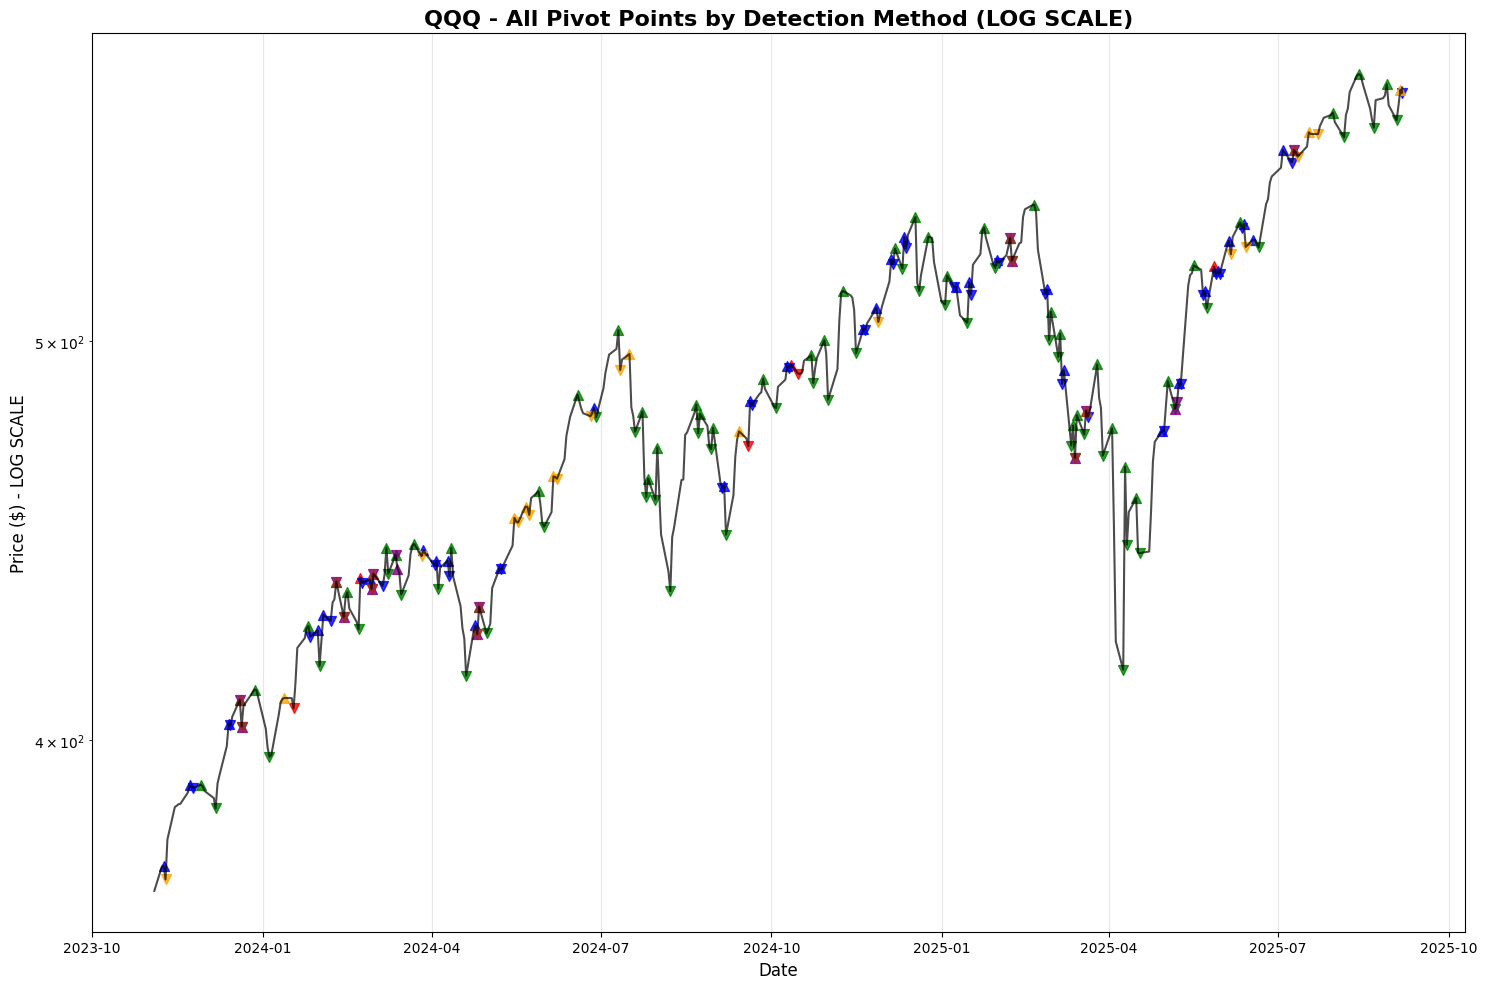

In [106]:
# Step 4: Comprehensive Pivot Visualization
print("🎨 Step 4: Creating comprehensive pivot visualization...")

# Create single plot figure
plt.figure(figsize=(15, 10))

# Main price chart with all pivots (LOG SCALE)
plt.semilogy(stock_data['Date'], stock_data['Price'], 'k-', alpha=0.7, linewidth=1.5)

# Define colors for each method
method_colors = {
    'scipy': 'red',
    'rolling': 'blue',
    'zigzag': 'green',
    'fractal': 'orange',
    'slope': 'purple',
    'derivative': 'brown'
}

# Plot pivots by method with different colors and markers
for method, color in method_colors.items():
    method_pivots = method_analysis[method]['pivots']

    # Separate highs and lows
    highs = [p for p in method_pivots if p['type'] == 'high']
    lows = [p for p in method_pivots if p['type'] == 'low']

    if highs:
        high_dates = [stock_data['Date'].iloc[p['index']] for p in highs]
        high_prices = [stock_data['Price'].iloc[p['index']] for p in highs]
        plt.scatter(high_dates, high_prices, color=color, marker='^', s=50, alpha=0.8)

    if lows:
        low_dates = [stock_data['Date'].iloc[p['index']] for p in lows]
        low_prices = [stock_data['Price'].iloc[p['index']] for p in lows]
        plt.scatter(low_dates, low_prices, color=color, marker='v', s=50, alpha=0.8)

plt.title(f'{SYMBOL} - All Pivot Points by Detection Method (LOG SCALE)',
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($) - LOG SCALE', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [107]:
# Step 5: Boundary Line Detection
print("📏 Step 5: Detecting boundary lines (support/resistance)...")

def detect_boundary_lines(stock_data, pivots, min_touches=2):
    """
    Detect boundary lines that connect pivots without crossing the price line
    """
    boundary_lines = []

    # Separate highs and lows
    highs = [p for p in pivots if p['type'] == 'high']
    lows = [p for p in pivots if p['type'] == 'low']

    def line_intersects_price(start_idx, end_idx, pivot_type, stock_data):
        """Check if line from start to end intersects with price data"""
        start_price = stock_data['LogPrice'].iloc[start_idx]
        end_price = stock_data['LogPrice'].iloc[end_idx]

        # Calculate line equation: y = mx + b (in log space)
        if end_idx == start_idx:
            return False

        slope = (end_price - start_price) / (end_idx - start_idx)
        intercept = start_price - slope * start_idx

        # Check each point between start and end
        for i in range(start_idx + 1, end_idx):
            line_price = slope * i + intercept
            actual_price = stock_data['LogPrice'].iloc[i]

            # For resistance (highs), line shouldn't go below price
            # For support (lows), line shouldn't go above price
            if pivot_type == 'high' and line_price < actual_price:
                return True
            elif pivot_type == 'low' and line_price > actual_price:
                return True

        return False

    def find_valid_connections(pivot_points, pivot_type):
        """Find valid connections between pivot points"""
        valid_lines = []

        for i in range(len(pivot_points)):
            for j in range(i + 1, len(pivot_points)):
                start_pivot = pivot_points[i]
                end_pivot = pivot_points[j]

                # Check if line intersects price data
                if not line_intersects_price(start_pivot['index'], end_pivot['index'], pivot_type, stock_data):
                    # Calculate line strength (how many other pivots it touches)
                    touches = 2  # Start and end points

                    # Check intermediate pivots
                    start_price = stock_data['LogPrice'].iloc[start_pivot['index']]
                    end_price = stock_data['LogPrice'].iloc[end_pivot['index']]

                    if end_pivot['index'] != start_pivot['index']:
                        slope = (end_price - start_price) / (end_pivot['index'] - start_pivot['index'])
                        intercept = start_price - slope * start_pivot['index']

                        # Check other pivots for touches (within tolerance)
                        tolerance = 0.005  # 0.5% in log space
                        for k, other_pivot in enumerate(pivot_points):
                            if k != i and k != j:
                                if start_pivot['index'] < other_pivot['index'] < end_pivot['index']:
                                    expected_price = slope * other_pivot['index'] + intercept
                                    actual_price = stock_data['LogPrice'].iloc[other_pivot['index']]
                                    if abs(expected_price - actual_price) < tolerance:
                                        touches += 1

                    valid_lines.append({
                        'start_pivot': start_pivot,
                        'end_pivot': end_pivot,
                        'type': pivot_type,
                        'touches': touches,
                        'slope': slope if 'slope' in locals() else 0,
                        'intercept': intercept if 'intercept' in locals() else 0,
                        'length_days': abs(end_pivot['index'] - start_pivot['index'])
                    })

        return valid_lines

    # Find boundary lines for highs (resistance)
    print("   🔍 Finding resistance lines (connecting highs)...")
    resistance_lines = find_valid_connections(highs, 'high')

    # Find boundary lines for lows (support)
    print("   🔍 Finding support lines (connecting lows)...")
    support_lines = find_valid_connections(lows, 'low')

    # Filter by minimum touches and sort by strength
    resistance_lines = [line for line in resistance_lines if line['touches'] >= min_touches]
    support_lines = [line for line in support_lines if line['touches'] >= min_touches]

    resistance_lines.sort(key=lambda x: (x['touches'], x['length_days']), reverse=True)
    support_lines.sort(key=lambda x: (x['touches'], x['length_days']), reverse=True)

    print(f"   ✅ Found {len(resistance_lines)} resistance lines")
    print(f"   ✅ Found {len(support_lines)} support lines")

    return resistance_lines, support_lines

# Detect boundary lines
resistance_lines, support_lines = detect_boundary_lines(stock_data, pivots, min_touches=2)

# Show top lines
print(f"\n📈 Top 5 Resistance Lines:")
for i, line in enumerate(resistance_lines[:5], 1):
    start_date = stock_data['Date'].iloc[line['start_pivot']['index']].strftime('%Y-%m-%d')
    end_date = stock_data['Date'].iloc[line['end_pivot']['index']].strftime('%Y-%m-%d')
    print(f"   {i}. {start_date} → {end_date} ({line['touches']} touches, {line['length_days']} days)")

print(f"\n📉 Top 5 Support Lines:")
for i, line in enumerate(support_lines[:5], 1):
    start_date = stock_data['Date'].iloc[line['start_pivot']['index']].strftime('%Y-%m-%d')
    end_date = stock_data['Date'].iloc[line['end_pivot']['index']].strftime('%Y-%m-%d')
    print(f"   {i}. {start_date} → {end_date} ({line['touches']} touches, {line['length_days']} days)")

📏 Step 5: Detecting boundary lines (support/resistance)...
   🔍 Finding resistance lines (connecting highs)...
   🔍 Finding support lines (connecting lows)...
   ✅ Found 344 resistance lines
   ✅ Found 461 support lines

📈 Top 5 Resistance Lines:
   1. 2024-08-23 → 2024-10-29 (6 touches, 36 days)
   2. 2025-02-26 → 2025-07-17 (5 touches, 75 days)
   3. 2025-02-28 → 2025-07-17 (5 touches, 73 days)
   4. 2024-08-21 → 2024-10-22 (5 touches, 34 days)
   5. 2024-09-26 → 2024-10-29 (5 touches, 17 days)

📉 Top 5 Support Lines:
   1. 2025-04-30 → 2025-06-11 (8 touches, 23 days)
   2. 2025-04-30 → 2025-06-05 (7 touches, 20 days)
   3. 2024-12-10 → 2025-03-13 (6 touches, 51 days)
   4. 2024-12-10 → 2025-03-13 (6 touches, 51 days)
   5. 2025-04-30 → 2025-05-30 (6 touches, 17 days)


🎨 Step 6: Visualizing boundary lines...


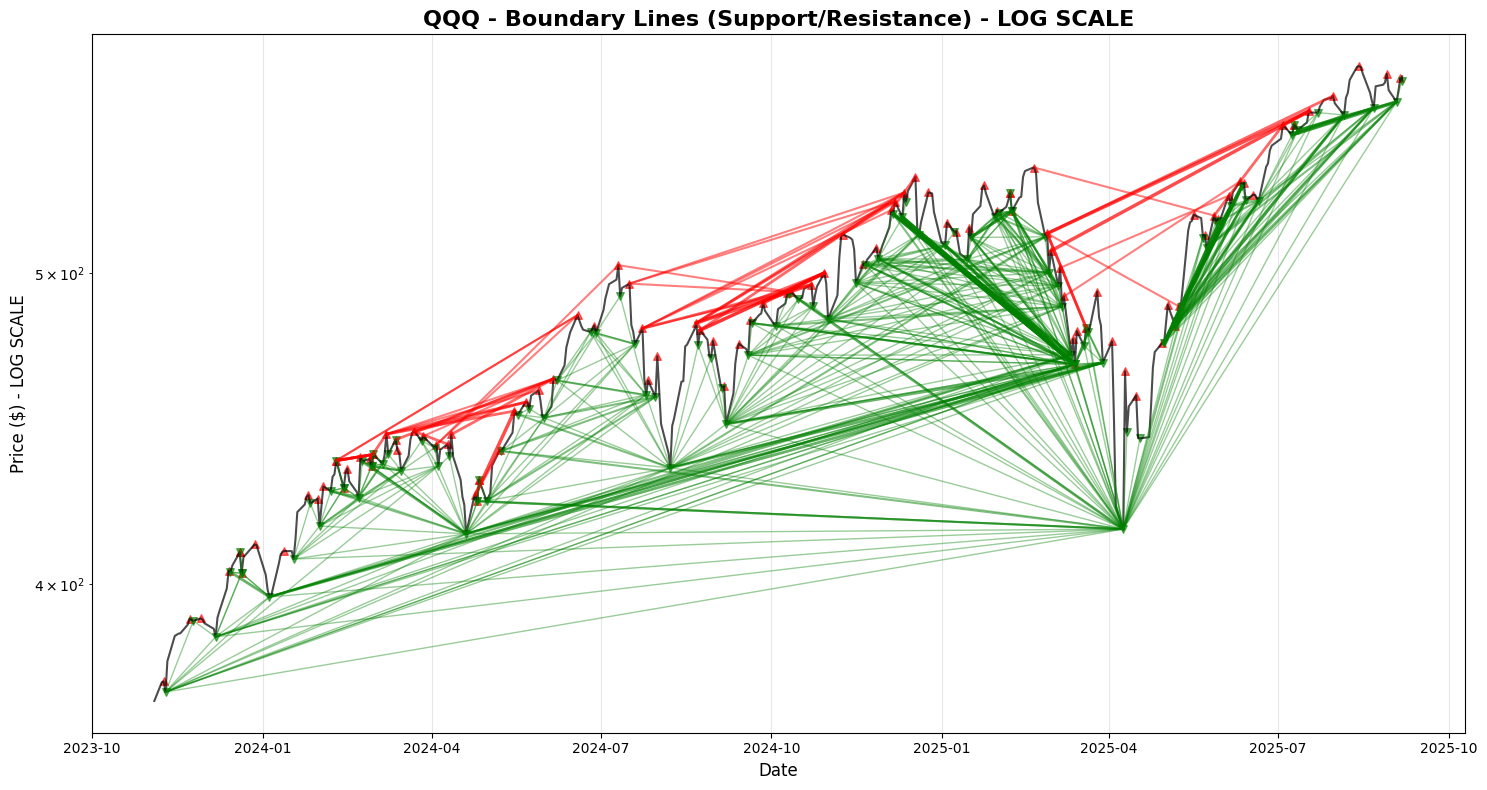


📊 Boundary Lines Summary (Top 50):
   Resistance lines shown: 50
   Support lines shown: 50
   Total resistance lines found: 344
   Total support lines found: 461
   Strongest resistance line: 6 touches
   Strongest support line: 8 touches


In [108]:
# Step 6: Boundary Lines Visualization
print("🎨 Step 6: Visualizing boundary lines...")

# Create single plot figure
plt.figure(figsize=(15, 8))

# Main price chart (LOG SCALE)
plt.semilogy(stock_data['Date'], stock_data['Price'], 'k-', alpha=0.7, linewidth=1.5)

# Plot all pivot points (simplified - just red/green for high/low)
all_highs = [p for p in pivots if p['type'] == 'high']
all_lows = [p for p in pivots if p['type'] == 'low']

if all_highs:
    high_dates = [stock_data['Date'].iloc[p['index']] for p in all_highs]
    high_prices = [stock_data['Price'].iloc[p['index']] for p in all_highs]
    plt.scatter(high_dates, high_prices, color='red', marker='^', s=30, alpha=0.6)

if all_lows:
    low_dates = [stock_data['Date'].iloc[p['index']] for p in all_lows]
    low_prices = [stock_data['Price'].iloc[p['index']] for p in all_lows]
    plt.scatter(low_dates, low_prices, color='green', marker='v', s=30, alpha=0.6)

# Plot resistance lines (connecting highs) - Top 50
for i, line in enumerate(resistance_lines[:50]):  # Top 50 resistance lines
    start_idx = line['start_pivot']['index']
    end_idx = line['end_pivot']['index']

    start_date = stock_data['Date'].iloc[start_idx]
    end_date = stock_data['Date'].iloc[end_idx]
    start_price = stock_data['Price'].iloc[start_idx]
    end_price = stock_data['Price'].iloc[end_idx]

    # Reduced line thickness for cleaner look
    thickness = min(line['touches'] * 0.5, 2.5)  # Max thickness of 2.5
    alpha = min(0.2 + (line['touches'] * 0.1), 0.8)  # More transparent

    plt.plot([start_date, end_date], [start_price, end_price],
             color='red', linewidth=thickness, alpha=alpha, linestyle='-')

# Plot support lines (connecting lows) - Top 50
for i, line in enumerate(support_lines[:]):  # Top 50 support lines
    start_idx = line['start_pivot']['index']
    end_idx = line['end_pivot']['index']

    start_date = stock_data['Date'].iloc[start_idx]
    end_date = stock_data['Date'].iloc[end_idx]
    start_price = stock_data['Price'].iloc[start_idx]
    end_price = stock_data['Price'].iloc[end_idx]

    # Reduced line thickness for cleaner look
    thickness = min(line['touches'] * 0.5, 2.5)  # Max thickness of 2.5
    alpha = min(0.2 + (line['touches'] * 0.1), 0.8)  # More transparent

    plt.plot([start_date, end_date], [start_price, end_price],
             color='green', linewidth=thickness, alpha=alpha, linestyle='-')

plt.title(f'{SYMBOL} - Boundary Lines (Support/Resistance) - LOG SCALE',
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($) - LOG SCALE', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📊 Boundary Lines Summary (Top 50):")
print(f"   Resistance lines shown: {min(50, len(resistance_lines))}")
print(f"   Support lines shown: {min(50, len(support_lines))}")
print(f"   Total resistance lines found: {len(resistance_lines)}")
print(f"   Total support lines found: {len(support_lines)}")
if resistance_lines:
    print(f"   Strongest resistance line: {max(resistance_lines, key=lambda x: x['touches'])['touches']} touches")
if support_lines:
    print(f"   Strongest support line: {max(support_lines, key=lambda x: x['touches'])['touches']} touches")

In [109]:
# Step 7: Outer Envelope Boundary Lines
print("🌐 Step 7: Adding outer envelope boundary lines...")

def detect_outer_envelope_lines(stock_data, pivots):
    """
    Detect outer envelope lines that wrap around existing lines
    These are true boundary lines that touch the absolute extremes
    Only need 2 points to draw a line, but must be true boundaries
    """
    highs = [p for p in pivots if p['type'] == 'high']
    lows = [p for p in pivots if p['type'] == 'low']

    def is_true_boundary(start_idx, end_idx, pivot_type, stock_data):
        """Check if line represents a true outer boundary"""
        start_price = stock_data['LogPrice'].iloc[start_idx]
        end_price = stock_data['LogPrice'].iloc[end_idx]

        if end_idx == start_idx:
            return False

        slope = (end_price - start_price) / (end_idx - start_idx)
        intercept = start_price - slope * start_idx

        # For outer boundaries, NO price should breach significantly
        for i in range(start_idx, end_idx + 1):
            line_price = slope * i + intercept
            actual_price = stock_data['LogPrice'].iloc[i]

            # For resistance (highs), price should NEVER go significantly above line
            # For support (lows), price should NEVER go significantly below line
            if pivot_type == 'high' and actual_price > (line_price + 0.003):  # 0.3% tolerance
                return False
            elif pivot_type == 'low' and actual_price < (line_price - 0.003):  # 0.3% tolerance
                return False

        return True

    def find_outer_boundaries(pivot_points, pivot_type):
        """Find outer envelope lines connecting any 2+ pivot points"""
        envelope_lines = []

        for i in range(len(pivot_points)):
            for j in range(i + 1, len(pivot_points)):
                start_pivot = pivot_points[i]
                end_pivot = pivot_points[j]

                # Must be at least 15 days apart for meaningful envelope
                if abs(end_pivot['index'] - start_pivot['index']) < 15:
                    continue

                # Check if this is a true outer boundary
                if is_true_boundary(start_pivot['index'], end_pivot['index'], pivot_type, stock_data):

                    # Calculate how many other pivots this line touches/encompasses
                    start_price = stock_data['LogPrice'].iloc[start_pivot['index']]
                    end_price = stock_data['LogPrice'].iloc[end_pivot['index']]

                    slope = (end_price - start_price) / (end_pivot['index'] - start_pivot['index'])
                    intercept = start_price - slope * start_pivot['index']

                    # Count pivots that are "captured" by this envelope
                    captured_pivots = 2  # start and end

                    for k, other_pivot in enumerate(pivot_points):
                        if k != i and k != j:
                            if start_pivot['index'] <= other_pivot['index'] <= end_pivot['index']:
                                expected_price = slope * other_pivot['index'] + intercept
                                actual_price = stock_data['LogPrice'].iloc[other_pivot['index']]

                                # For envelope, pivots should be AT or INSIDE the boundary
                                if pivot_type == 'high' and actual_price <= (expected_price + 0.005):
                                    captured_pivots += 1
                                elif pivot_type == 'low' and actual_price >= (expected_price - 0.005):
                                    captured_pivots += 1

                    envelope_lines.append({
                        'start_pivot': start_pivot,
                        'end_pivot': end_pivot,
                        'type': pivot_type,
                        'captured_pivots': captured_pivots,
                        'slope': slope,
                        'intercept': intercept,
                        'length_days': abs(end_pivot['index'] - start_pivot['index']),
                        'envelope_score': captured_pivots * (1 + end_pivot['index'] - start_pivot['index']) / 100
                    })

        # Sort by envelope score (captures more pivots over longer period = better)
        envelope_lines.sort(key=lambda x: x['envelope_score'], reverse=True)

        print(f"   📊 Found {len(envelope_lines)} outer {pivot_type} envelope lines")
        return envelope_lines

    # Find outer envelope lines
    print("   🔍 Finding outer resistance envelopes...")
    resistance_envelopes = find_outer_boundaries(highs, 'high')

    print("   🔍 Finding outer support envelopes...")
    support_envelopes = find_outer_boundaries(lows, 'low')

    return resistance_envelopes, support_envelopes

# Detect outer envelope lines
resistance_envelopes, support_envelopes = detect_outer_envelope_lines(stock_data, pivots)

print(f"\n📊 Outer Envelope Detection Results:")
print(f"   Resistance envelopes: {len(resistance_envelopes)}")
print(f"   Support envelopes: {len(support_envelopes)}")

if resistance_envelopes:
    print(f"\n📈 Top 5 Resistance Envelopes:")
    for i, line in enumerate(resistance_envelopes[:5], 1):
        start_date = stock_data['Date'].iloc[line['start_pivot']['index']].strftime('%Y-%m-%d')
        end_date = stock_data['Date'].iloc[line['end_pivot']['index']].strftime('%Y-%m-%d')
        print(f"   {i}. {start_date} → {end_date} ({line['captured_pivots']} pivots, {line['length_days']} days)")

if support_envelopes:
    print(f"\n📉 Top 5 Support Envelopes:")
    for i, line in enumerate(support_envelopes[:5], 1):
        start_date = stock_data['Date'].iloc[line['start_pivot']['index']].strftime('%Y-%m-%d')
        end_date = stock_data['Date'].iloc[line['end_pivot']['index']].strftime('%Y-%m-%d')
        print(f"   {i}. {start_date} → {end_date} ({line['captured_pivots']} pivots, {line['length_days']} days)")

🌐 Step 7: Adding outer envelope boundary lines...
   🔍 Finding outer resistance envelopes...
   📊 Found 224 outer high envelope lines
   🔍 Finding outer support envelopes...
   📊 Found 316 outer low envelope lines

📊 Outer Envelope Detection Results:
   Resistance envelopes: 224
   Support envelopes: 316

📈 Top 5 Resistance Envelopes:
   1. 2024-12-17 → 2025-08-13 (42 pivots, 127 days)
   2. 2024-12-24 → 2025-08-13 (41 pivots, 123 days)
   3. 2024-12-17 → 2025-07-30 (41 pivots, 120 days)
   4. 2024-12-24 → 2025-07-30 (40 pivots, 116 days)
   5. 2024-12-17 → 2025-07-17 (40 pivots, 113 days)

📉 Top 5 Support Envelopes:
   1. 2023-11-09 → 2025-04-08 (84 pivots, 278 days)
   2. 2023-11-09 → 2025-03-28 (83 pivots, 274 days)
   3. 2023-12-06 → 2025-04-08 (82 pivots, 265 days)
   4. 2023-12-06 → 2025-03-28 (81 pivots, 261 days)
   5. 2023-11-09 → 2025-03-13 (79 pivots, 265 days)


🎨 Step 8: Visualizing ALL boundary lines (existing + outer envelopes)...


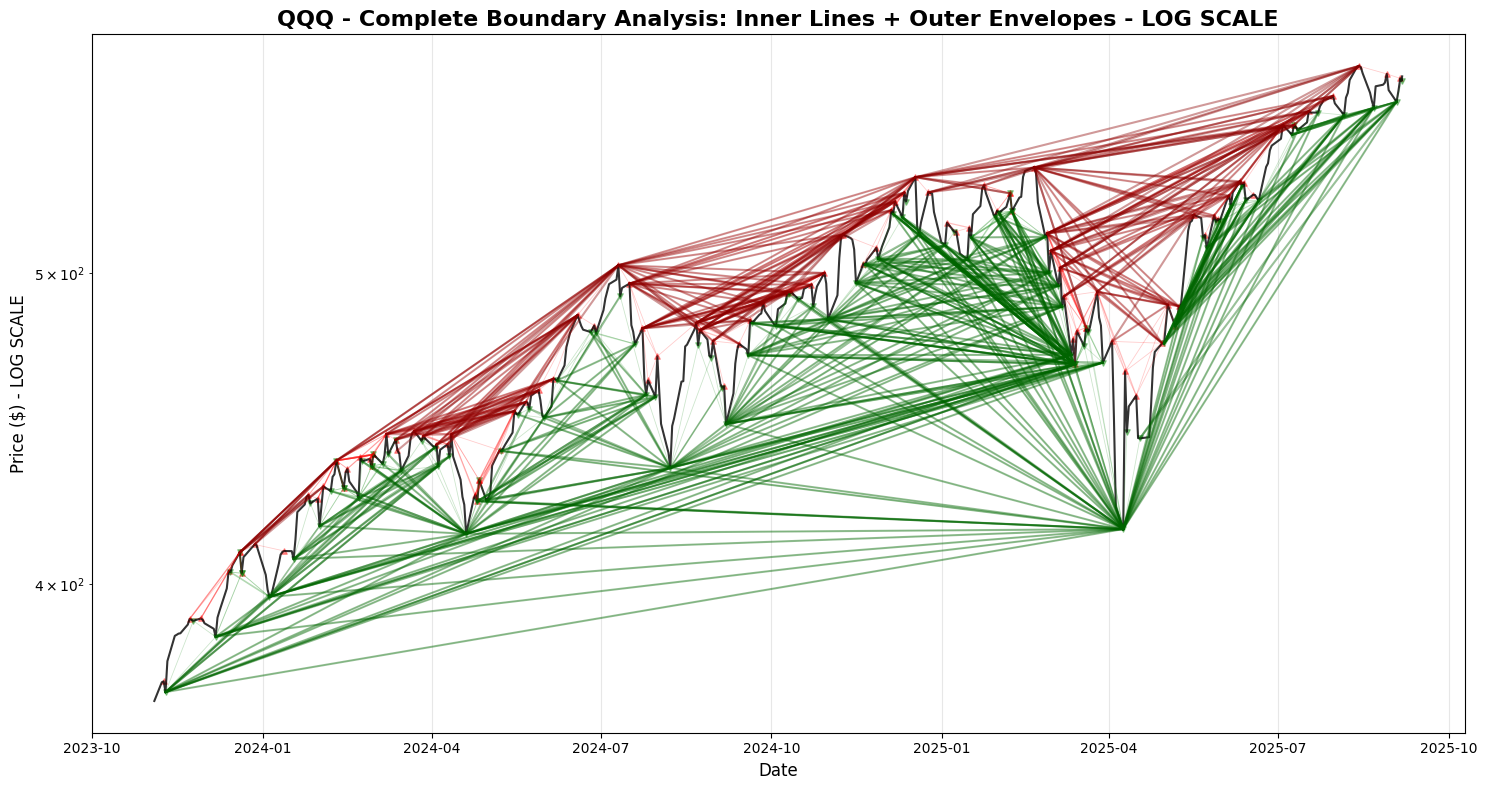


📊 Complete Boundary Lines Summary:
   Existing resistance lines: 344
   Existing support lines: 461
   Outer resistance envelopes: 224
   Outer support envelopes: 316
   TOTAL boundary lines: 1345
   Strongest resistance envelope: 42 captured pivots
   Strongest support envelope: 84 captured pivots


In [111]:
# Step 8: Combined Boundary Lines + Outer Envelope Visualization
print("🎨 Step 8: Visualizing ALL boundary lines (existing + outer envelopes)...")

# Create single plot figure
plt.figure(figsize=(15, 8))

# Main price chart (LOG SCALE)
plt.semilogy(stock_data['Date'], stock_data['Price'], 'k-', alpha=0.8, linewidth=1.5)

# Plot all pivot points (smaller for cleaner look)
all_highs = [p for p in pivots if p['type'] == 'high']
all_lows = [p for p in pivots if p['type'] == 'low']

if all_highs:
    high_dates = [stock_data['Date'].iloc[p['index']] for p in all_highs]
    high_prices = [stock_data['Price'].iloc[p['index']] for p in all_highs]
    plt.scatter(high_dates, high_prices, color='red', marker='^', s=15, alpha=0.4)

if all_lows:
    low_dates = [stock_data['Date'].iloc[p['index']] for p in all_lows]
    low_prices = [stock_data['Price'].iloc[p['index']] for p in all_lows]
    plt.scatter(low_dates, low_prices, color='green', marker='v', s=15, alpha=0.4)

# Plot existing resistance lines (thinner for background)
for line in resistance_lines:
    start_idx = line['start_pivot']['index']
    end_idx = line['end_pivot']['index']

    start_date = stock_data['Date'].iloc[start_idx]
    end_date = stock_data['Date'].iloc[end_idx]
    start_price = stock_data['Price'].iloc[start_idx]
    end_price = stock_data['Price'].iloc[end_idx]

    thickness = min(line['touches'] * 0.3, 1.5)  # Thinner
    alpha = min(0.1 + (line['touches'] * 0.05), 0.4)  # More transparent

    plt.plot([start_date, end_date], [start_price, end_price],
             color='red', linewidth=thickness, alpha=alpha, linestyle='-')

# Plot existing support lines (thinner for background)
for line in support_lines:
    start_idx = line['start_pivot']['index']
    end_idx = line['end_pivot']['index']

    start_date = stock_data['Date'].iloc[start_idx]
    end_date = stock_data['Date'].iloc[end_idx]
    start_price = stock_data['Price'].iloc[start_idx]
    end_price = stock_data['Price'].iloc[end_idx]

    thickness = min(line['touches'] * 0.3, 1.5)  # Thinner
    alpha = min(0.1 + (line['touches'] * 0.05), 0.4)  # More transparent

    plt.plot([start_date, end_date], [start_price, end_price],
             color='green', linewidth=thickness, alpha=alpha, linestyle='-')

# Plot OUTER ENVELOPE resistance lines (thicker, more prominent)
for line in resistance_envelopes:
    start_idx = line['start_pivot']['index']
    end_idx = line['end_pivot']['index']

    start_date = stock_data['Date'].iloc[start_idx]
    end_date = stock_data['Date'].iloc[end_idx]
    start_price = stock_data['Price'].iloc[start_idx]
    end_price = stock_data['Price'].iloc[end_idx]

    # Thicker lines for outer envelopes
    thickness = min(line['captured_pivots'] * 0.3, 1.5)  # 2-4 pixel range
    alpha = 0.4  # More opaque

    plt.plot([start_date, end_date], [start_price, end_price],
             color='darkred', linewidth=thickness, alpha=alpha, linestyle='-')

# Plot OUTER ENVELOPE support lines (thicker, more prominent)
for line in support_envelopes:
    start_idx = line['start_pivot']['index']
    end_idx = line['end_pivot']['index']

    start_date = stock_data['Date'].iloc[start_idx]
    end_date = stock_data['Date'].iloc[end_idx]
    start_price = stock_data['Price'].iloc[start_idx]
    end_price = stock_data['Price'].iloc[end_idx]

    # Thicker lines for outer envelopes
    thickness = min(line['captured_pivots'] * 0.3, 1.5)  # 2-4 pixel range
    alpha = 0.4  # More opaque

    plt.plot([start_date, end_date], [start_price, end_price],
             color='darkgreen', linewidth=thickness, alpha=alpha, linestyle='-')

plt.title(f'{SYMBOL} - Complete Boundary Analysis: Inner Lines + Outer Envelopes - LOG SCALE',
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($) - LOG SCALE', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Combined summary statistics
print(f"\n📊 Complete Boundary Lines Summary:")
print(f"   Existing resistance lines: {len(resistance_lines)}")
print(f"   Existing support lines: {len(support_lines)}")
print(f"   Outer resistance envelopes: {len(resistance_envelopes)}")
print(f"   Outer support envelopes: {len(support_envelopes)}")
print(f"   TOTAL boundary lines: {len(resistance_lines) + len(support_lines) + len(resistance_envelopes) + len(support_envelopes)}")

if resistance_envelopes:
    max_resistance_envelope = max(resistance_envelopes, key=lambda x: x['captured_pivots'])
    print(f"   Strongest resistance envelope: {max_resistance_envelope['captured_pivots']} captured pivots")

if support_envelopes:
    max_support_envelope = max(support_envelopes, key=lambda x: x['captured_pivots'])
    print(f"   Strongest support envelope: {max_support_envelope['captured_pivots']} captured pivots")